In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import issparse

In [4]:
from anndata import read_h5ad

adata = read_h5ad("mouse_diabetes.h5ad", backed='r')

In [5]:
cell_types = adata.obs['cell_type'].unique().tolist()
print(f"Found cell types: {cell_types}")

Found cell types: ['pancreatic ductal cell', 'pancreatic PP cell', 'endothelial cell', 'hematopoietic cell', 'pancreatic stellate cell', 'pancreatic D cell', 'pancreatic endocrine cell', 'type B pancreatic cell', 'unknown', 'pancreatic A cell', 'cell', 'pancreatic acinar cell', 'Schwann cell']


In [ ]:
#for cell_type in cell_types:
#    print(f"Processing cell type: {cell_type}")
#    
#    # Get indices of cells with this cell type
#    indices = adata.obs[adata.obs['cell_type'] == cell_type].index
#    
#    # Subset the data (load into memory)
#    adata_subset = adata[indices, :].to_memory()
#    
#    # Save as separate .h5ad
#    filename = f"{cell_type}_subset.h5ad"
#    adata_subset.write(filename)
#    print(f"Saved {filename}")

Processing cell type: pancreatic ductal cell
Saved pancreatic ductal cell_subset.h5ad
Processing cell type: pancreatic PP cell
Saved pancreatic PP cell_subset.h5ad
Processing cell type: endothelial cell
Saved endothelial cell_subset.h5ad
Processing cell type: hematopoietic cell
Saved hematopoietic cell_subset.h5ad
Processing cell type: pancreatic stellate cell
Saved pancreatic stellate cell_subset.h5ad
Processing cell type: pancreatic D cell
Saved pancreatic D cell_subset.h5ad
Processing cell type: pancreatic endocrine cell
Saved pancreatic endocrine cell_subset.h5ad
Processing cell type: type B pancreatic cell
Saved type B pancreatic cell_subset.h5ad
Processing cell type: unknown
Saved unknown_subset.h5ad
Processing cell type: pancreatic A cell
Saved pancreatic A cell_subset.h5ad
Processing cell type: cell
Saved cell_subset.h5ad
Processing cell type: pancreatic acinar cell
Saved pancreatic acinar cell_subset.h5ad
Processing cell type: Schwann cell
Saved Schwann cell_subset.h5ad


In [18]:
diseases = adata.obs['disease'].unique().tolist()
print(f"Diseases: {diseases}")



Diseases: ['type 1 diabetes mellitus', 'type 2 diabetes mellitus', 'normal', 'endocrine pancreas disorder']


In [ ]:
#for cell_type in cell_types:
#    for disease in diseases:
#        print(f"Processing {cell_type} in {disease}")
#        
#        # Get indices for this combination
#        mask = (adata.obs['cell_type'] == cell_type) & (adata.obs['disease'] == disease)
#        indices = adata.obs[mask].index
#        
#        if len(indices) == 0:
#            print(f"⚠️ No cells found for {cell_type} in {disease}")
#            continue
#        
#        # Subset data and load into memory
#        adata_subset = adata[indices, :].to_memory()
#        
#        # Save to a file
#        filename = f"{cell_type}_{disease}_subset.h5ad"
#        adata_subset.write(filename)
#        print(f"✅ Saved {filename} with {adata_subset.n_obs} cells")

Processing pancreatic ductal cell in type 1 diabetes mellitus
✅ Saved pancreatic ductal cell_type 1 diabetes mellitus_subset.h5ad with 3599 cells
Processing pancreatic ductal cell in type 2 diabetes mellitus
✅ Saved pancreatic ductal cell_type 2 diabetes mellitus_subset.h5ad with 3103 cells
Processing pancreatic ductal cell in normal
✅ Saved pancreatic ductal cell_normal_subset.h5ad with 2011 cells
Processing pancreatic ductal cell in endocrine pancreas disorder
✅ Saved pancreatic ductal cell_endocrine pancreas disorder_subset.h5ad with 29 cells
Processing pancreatic PP cell in type 1 diabetes mellitus
✅ Saved pancreatic PP cell_type 1 diabetes mellitus_subset.h5ad with 826 cells
Processing pancreatic PP cell in type 2 diabetes mellitus
✅ Saved pancreatic PP cell_type 2 diabetes mellitus_subset.h5ad with 3300 cells
Processing pancreatic PP cell in normal
✅ Saved pancreatic PP cell_normal_subset.h5ad with 2271 cells
Processing pancreatic PP cell in endocrine pancreas disorder
✅ Saved pa

In [7]:
import scanpy as sc

# Path to the subfolder and file
file_path = 'Data_set/pancreatic A cell_normal_subset.h5ad'

# Load the AnnData object
data_A_cell_normal = sc.read_h5ad(file_path)

print(data_A_cell_normal)

AnnData object with n_obs × n_vars = 16269 × 31202
    obs: 'batch_integration', 'dataset', 'design', 'cell_cycle_phase', 'ins_high', 'gcg_high', 'sst_high', 'ppy_high', 'cell_filtering', 'strain', 'age', 'cell_type_originalDataset_unified', 'cell_type_originalDataset', 'cell_type_reannotatedIntegrated', 'n_genes', 'mt_frac', 'doublet_score', 'log10_n_counts', 'age_approxDays', 'dataset__design__sample', 'cell_subtype_immune_reannotatedIntegrated', 'cell_subtype_endothelial_reannotatedIntegrated', 'emptyDrops_LogProb_scaled', 'cell_subtype_beta_coarse_reannotatedIntegrated', 'cell_subtype_beta_fine_reannotatedIntegrated', 'GP_1', 'GP_2', 'GP_3', 'GP_4', 'GP_5', 'GP_6', 'GP_7', 'GP_8', 'GP_9', 'GP_10', 'GP_11', 'GP_12', 'GP_13', 'GP_14', 'GP_15', 'GP_16', 'GP_17', 'GP_18', 'GP_19', 'GP_20', 'GP_21', 'GP_22', 'GP_23', 'GP_24', 'GP_25', 'GP_26', 'GP_27', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'diabetes_model', 'chemical_stress', 'GEO_

In [10]:
print(data_A_cell_normal.X[:10])

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 26716 stored elements and shape (10, 31202)>
  Coords	Values
  (0, 10)	1.5430577993392944
  (0, 21)	1.0436060428619385
  (0, 28)	1.5430577993392944
  (0, 31)	1.0436060428619385
  (0, 37)	4.851414680480957
  (0, 60)	1.5430577993392944
  (0, 64)	1.5430577993392944
  (0, 74)	7.917696952819824
  (0, 75)	1.0436060428619385
  (0, 80)	1.0436060428619385
  (0, 97)	1.0436060428619385
  (0, 102)	1.5430577993392944
  (0, 124)	1.0436060428619385
  (0, 126)	4.745324611663818
  (0, 130)	1.0436060428619385
  (0, 134)	1.5430577993392944
  (0, 143)	1.5430577993392944
  (0, 144)	1.0436060428619385
  (0, 155)	1.0436060428619385
  (0, 163)	1.0436060428619385
  (0, 177)	1.0436060428619385
  (0, 193)	1.5430577993392944
  (0, 208)	1.0436060428619385
  (0, 212)	2.1231894493103027
  (0, 213)	1.0436060428619385
  :	:
  (9, 24664)	0.7113644480705261
  (9, 24702)	0.7113644480705261
  (9, 24713)	0.7113644480705261
  (9, 24724)	3.125537633895874
  (9, 24

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of genes (features)
n_genes = data_A_cell_normal.shape[1]
# Desired latent dimension
latent_dim = 500

# Encoder
input_layer = layers.Input(shape=(n_genes,))
encoded = layers.Dense(1024, activation='relu')(input_layer)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
decoded = layers.Dense(n_genes, activation='linear')(decoded)

# Autoencoder Model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Encoder Model (for extracting latent features)
encoder = models.Model(input_layer, encoded)

In [12]:
X =  data_A_cell_normal.X.toarray() if not isinstance(data_A_cell_normal.X, np.ndarray) else data_A_cell_normal.X

# Optional: scale the data (e.g., MinMaxScaler or StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the autoencoder
autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 927ms/step - loss: 0.6846 - val_loss: 0.6806
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 850ms/step - loss: 0.6784 - val_loss: 0.6768
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 810ms/step - loss: 0.6703 - val_loss: 0.6751
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 814ms/step - loss: 0.6695 - val_loss: 0.6747
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 775ms/step - loss: 0.6675 - val_loss: 0.6744
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 801ms/step - loss: 0.6649 - val_loss: 0.6746
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 772ms/step - loss: 0.6655 - val_loss: 0.6749
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 762ms/step - loss: 0.6621 - val_loss: 0.6754
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 754ms/step - loss: 0.6600 - val_loss: 0.6762
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 744ms/step - loss: 0.6500 - val_loss: 0.6768
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 740ms/step - loss: 0.6560 - val_loss: 0.6774
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 33

In [13]:
X_latent = encoder.predict(X_scaled)
print(f"Latent representation shape: {X_latent.shape}")

509/509 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
Latent representation shape: (16269, 500)


In [26]:
data_A_cell_type1 = sc.read_h5ad('Data_set/pancreatic A cell_type 1 diabetes mellitus_subset.h5ad')

# Get the expression matrix (cells × genes)
A_cell_type1 = data_A_cell_type1.X.toarray() if not isinstance(data_A_cell_type1.X, np.ndarray) else data_A_cell_type1.X

data_A_cell_type2 = sc.read_h5ad('Data_set/pancreatic A cell_type 2 diabetes mellitus_subset.h5ad')

# Get the expression matrix (cells × genes)
A_cell_type2 = data_A_cell_type2.X.toarray() if not isinstance(data_A_cell_type2.X, np.ndarray) else data_A_cell_type2.X

data_A_cell_endocrine = sc.read_h5ad('Data_set/pancreatic A cell_endocrine pancreas disorder_subset.h5ad')

A_cell_endocrine = data_A_cell_endocrine.X.toarray() if not isinstance(data_A_cell_endocrine.X, np.ndarray) else data_A_cell_endocrine.X    



In [27]:
scaler = StandardScaler()
X_control_scaled = scaler.fit_transform(X)
X_type1_scaled = scaler.transform(A_cell_type1)
X_type2_scaled = scaler.transform(A_cell_type2)
X_endocrine_scaled = scaler.transform(A_cell_endocrine)


In [28]:
X_type1_latent = encoder.predict(X_type1_scaled)
print(f"Latent representation shape: {X_type1_latent.shape}")

X_type2_latent = encoder.predict(X_type2_scaled)
print(f"Latent representation shape: {X_type2_latent.shape}")

X_endocrine_latent = encoder.predict(X_endocrine_scaled)
print(f"Latent representation shape: {X_endocrine_latent.shape}")

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Latent representation shape: (6198, 500)
492/492 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step
Latent representation shape: (15727, 500)
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Latent representation shape: (2741, 500)


c:\Users\jakob\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


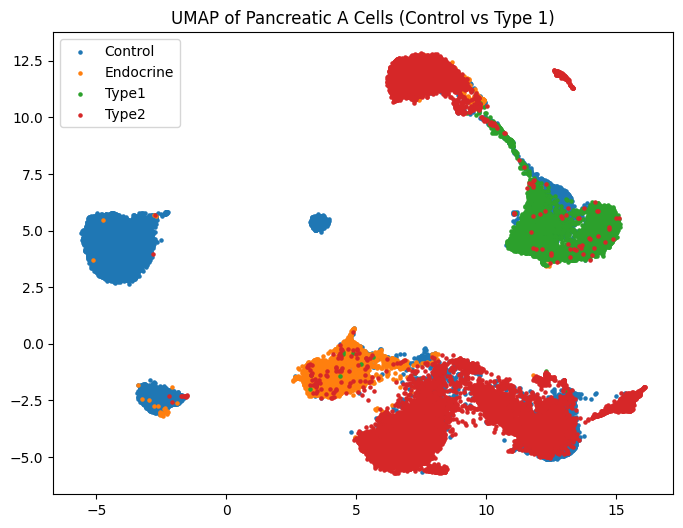

In [ ]:
import umap
import matplotlib.pyplot as plt


X_combined = np.vstack((X_latent, X_type1_latent, X_type2_latent, X_endocrine_latent))
labels = np.array(['Control'] * X_latent.shape[0] + ['Type1'] * X_type1_latent.shape[0] + ['Type2'] * X_type2_latent.shape[0] + ['Endocrine'] * X_endocrine_latent.shape[0])

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_combined)

# Plot
plt.figure(figsize=(8,6))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], s=5, label=label)
plt.title('UMAP of Pancreatic A Cells (Control vs Type 1)')
plt.legend()
plt.show()

